In [1]:
# Import Library of google play Scarper

from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import numpy as np
import datetime

# using now() to get current time when Scraping is begin
current_time = datetime.datetime.now()


In [2]:
# Get Token from com.instagram.android

result, continuation_token = reviews(
    'com.instagram.android',
    lang='id', #bahasa (Indonesia), language where review is issued
    country='id', # Country where reviewer come from
    sort=Sort.MOST_RELEVANT, #sorting the most relevant
    count=2000, #count of dataset requested
    filter_score_with= None  #filling with 1, 2, 3, 4, 5 None if tobe mixed
)


In [3]:
# Dataframe With Name

data = pd.DataFrame(np.array(result),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6f4fe7d4-dd6a-4897-a5b9-936d8b6a69dd,Rayhan Claudio,https://play-lh.googleusercontent.com/a-/ALV-U...,Banyak bug nya dan sampe sekarang belum diperb...,1,7,185.0.0.38.116,2021-05-02 04:57:15,None,None,185.0.0.38.116
1,9c34f6f5-dcb6-45ec-9bae-43670b14fd42,fatiya elsa,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong bangett yaa, ini udah sering Instagram ...",2,4,341.0.0.45.100,2024-07-26 13:29:26,None,None,341.0.0.45.100
2,0bbb62b7-918d-49c3-a1ce-aa19dca67756,Alfionita,https://play-lh.googleusercontent.com/a/ACg8oc...,"ini udah kejadian dari dulu si, tiap post stor...",2,909,333.0.0.42.91,2024-06-05 18:56:46,None,None,333.0.0.42.91
3,2583181e-9828-4edd-9a01-7d2312b6d3d4,Maura,https://play-lh.googleusercontent.com/a/ACg8oc...,"makinn lamaa makinn sering bug yaa instagramm,...",1,159,341.0.0.45.100,2024-07-25 00:25:58,None,None,341.0.0.45.100
4,da8830e1-9fdb-4d8b-99dd-d3ea75a43dc1,One ST,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong diperbaiki dong bug suara yg dipostinga...,2,1374,339.0.0.30.105,2024-07-10 17:44:34,None,None,339.0.0.30.105


In [4]:
#check length of dataset

len(data)

2000

In [5]:
# use relevant column 

data = data[['content','score']]
data.head()

,content,score
0,Banyak bug nya dan sampe sekarang belum diperb...,1
1,"Tolong bangett yaa, ini udah sering Instagram ...",2
2,"ini udah kejadian dari dulu si, tiap post stor...",2
3,"makinn lamaa makinn sering bug yaa instagramm,...",1
4,Tolong diperbaiki dong bug suara yg dipostinga...,2


In [6]:
# export to csv 

data.to_csv("Data Review.csv", index = False  , encoding='utf-8')

In [9]:
# Modify Rating to score analyst 

import pandas as pd

dataInstagram = pd.read_csv('/Users/fredyfirmansyahit/Desktop/TRAINING DS/Data Review.csv')


for i in range(len(dataInstagram ['score'])):
    if dataInstagram ['score'][i] == 5:
        dataInstagram['score'][i] = 'Very Good'
    if dataInstagram ['score'][i] == 4:
        dataInstagram['score'][i] = 'Like'
    if dataInstagram['score'][i] == 3:
        dataInstagram['score'][i] = 'Neutral'
    if dataInstagram['score'][i] == 2:
        dataInstagram['score'][i] = 'Not Good'
    if dataInstagram['score'][i] == 1:
        dataInstagram['score'][i] = 'Bad'

dataInstagram.to_csv("Result Data Review.csv", index = False  , encoding='utf-8')

/var/folders/1l/sjk_h4hj1j3720m3fb2wbyqw0000gn/T/ipykernel_5956/2482152158.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataInstagram['score'][i] = 'Bad'


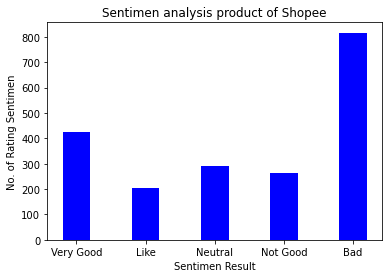

In [11]:
# Create Barplot visualization

from matplotlib import pyplot as plt

verg = (dataInstagram['score'] == 'Very Good').sum()
like = (dataInstagram['score'] == 'Like').sum()
Neu = (dataInstagram['score'] == 'Neutral').sum()
notg = (dataInstagram['score'] == 'Not Good').sum()
bad = (dataInstagram['score'] == 'Bad').sum()


sen = ['Very Good', 'Like', 'Neutral', 'Not Good', 'Bad']

data = [verg, like, Neu,notg,bad]

plt.bar(sen, data, color ='blue', 
        width = 0.4)

plt.xlabel("Sentimen Result")
plt.ylabel("No. of Rating Sentimen")
plt.title("Sentimen analysis Application of Instagram")
plt.show()

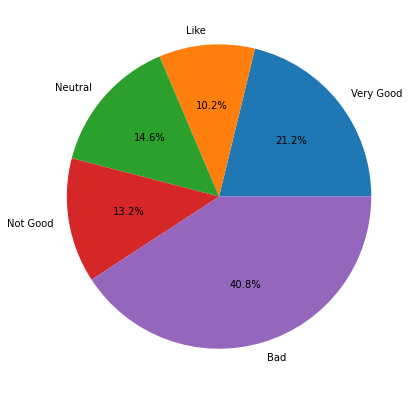

In [16]:
#Create Pie Chart precentage

sen = ['Very Good', 'Like', 'Neutral', 'Not Good', 'Bad']

data = [verg, like, Neu,notg,bad]

# Creating plot
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=sen, autopct='%1.1f%%')

# show plot
plt.show()

In [17]:
# Conclusion

import pandas as pd

dataInstagram = pd.read_csv('/Users/fredyfirmansyahit/Desktop/TRAINING DS/Data Review.csv')
avg = (dataInstagram['score']).mean()

print('Rating : ', avg)
print('Count Data : ', len(dataInstagram['score']))
print('Scraping Time execution : ', current_time )


Rating :  2.5775
Count Data :  2000
Scraping Time execution :  2024-08-23 17:05:48.003911
